# imports

In [1]:
from auxilary import tiffVisualize, run_command_line, createExperiment
from processing import binarize, dimCompose, threshold, skeletonize2, arrayStats
from segmentation import check_trailmap, stackToFolder, folderToStack, axonSegment
from registration import Registration, regExtract

# getting started!
here we will install the TrailMap axon segmentation model if nesscary and create our expirement

In [ ]:
exp_path = createExperiment("beta")
#exp_path = r"D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31"

In [ ]:
check_trailmap()
axon_stack = r"D:\axonAtlas2_data\AL211_647.tif"
autof_stack = r""
cell_stack = r""
tiffVisualize(axon_stack, views=3, colormap="turbo")

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


The folder 'TRAILMAP' was found in the current directory. Proceed!


# axon segmentation
here we will run trailmap and generate our axon segmentation masks

In [ ]:

seg_axon_stack = axonSegment(axon_stack, exp_path)
#seg_axon_stack = r"D:\axonAtlas2_data\AL211_647.tif"


<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()



--- Starting TRAILMAP Inference for 'AL211_647.tif' ---
Created temporary directory: 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\trailmap_inference_temp'

Converting 'AL211_647.tif' to frames folder...
Created output folder: 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\trailmap_inference_temp\AL211_647_folder'
Processing 1436 frames from 'D:\axonAtlas2_data\AL211_647.tif'...
Successfully saved all frames from 'D:\axonAtlas2_data\AL211_647.tif' to 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\trailmap_inference_temp\AL211_647_folder'.

Running TRAILMAP segmentation command...
Command executed: 'python TRAILMAP/segment_brain_batch.py D:/axonAtlas2/experiments/alpha_2025-09-08_14-35-31/trailmap_inference_temp/AL211_647_folder'
Return Code: 0
STDOUT:
Name: AL211_647_folder

[                                        ]   0%       ETA: Pending        
[                                        ]   0%       ETA: 625.4 mins     
[=                                       ]  

Successfully saved TIFF stack to 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\seg-AL211_647.tif'.

Cleaning up temporary folders...
Deleted original frames folder: 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\trailmap_inference_temp\AL211_647_folder'
Deleted segmented frames folder: 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\trailmap_inference_temp\seg-AL211_647_folder'
Deleted temporary base directory: 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\trailmap_inference_temp'

--- TRAILMAP Inference Completed Successfully! ---
Final segmented TIFF stack saved to: 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\seg-AL211_647.tif'


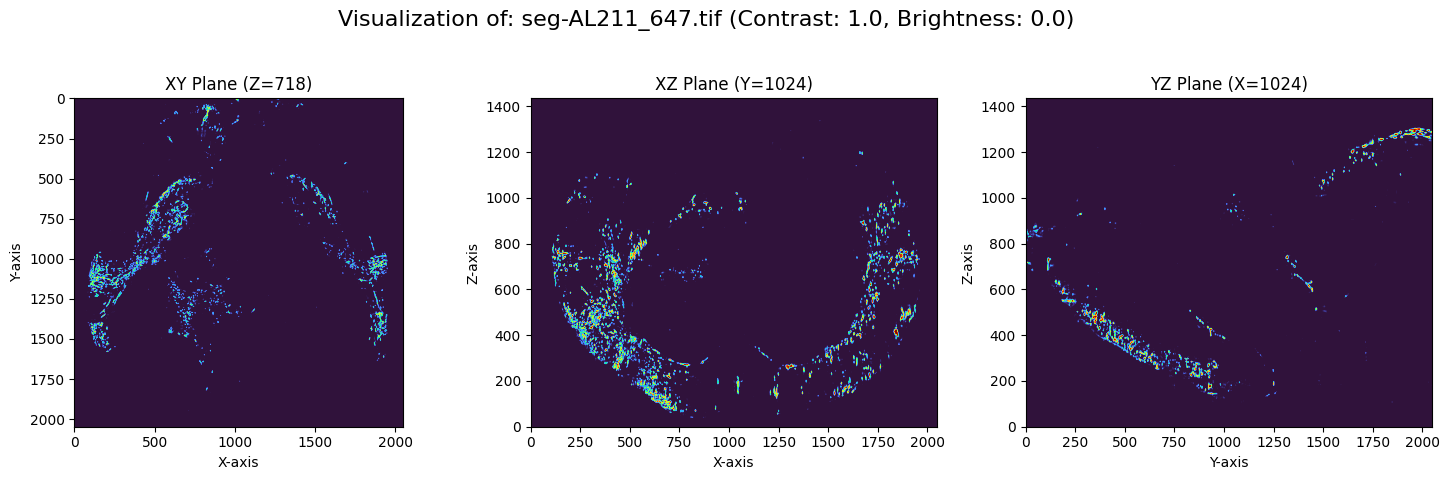

Successfully visualized 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\seg-AL211_647.tif'.


In [ ]:
tiffVisualize(seg_axon_stack, views=3, colormap="turbo")

# composition
here we binarize our segmentation masks and compose them with the raw axonal data to prepare for registration|

Binarizing 1436 frames from 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\seg-AL211_647.tif'...
  Processed 100/1436 frames...
  Processed 200/1436 frames...
  Processed 300/1436 frames...
  Processed 400/1436 frames...
  Processed 500/1436 frames...
  Processed 600/1436 frames...
  Processed 700/1436 frames...
  Processed 800/1436 frames...
  Processed 900/1436 frames...
  Processed 1000/1436 frames...
  Processed 1100/1436 frames...
  Processed 1200/1436 frames...
  Processed 1300/1436 frames...
  Processed 1400/1436 frames...
  Processed 1436/1436 frames...
Successfully created binarized TIFF stack: 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\seg-AL211_647_binary.tif'.


<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


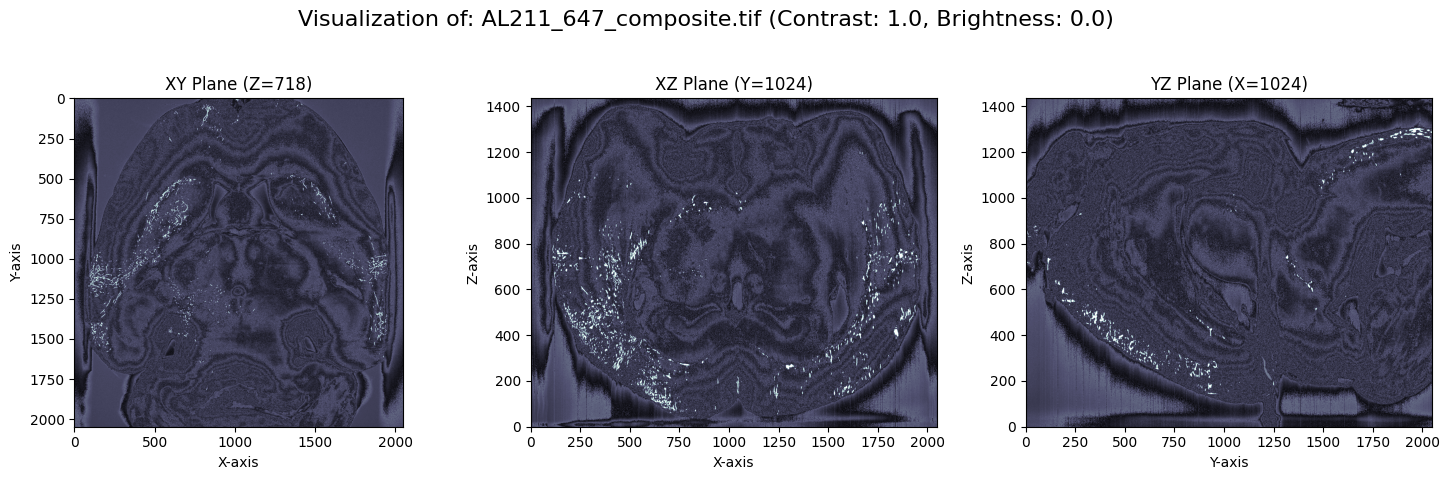

Successfully visualized 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\AL211_647_composite.tif'.


In [ ]:
binary = binarize(seg_axon_stack, exp_path)
axon_proc = dimCompose(binary, axon_stack, exp_path, dim_factor = 0.5)
tiffVisualize(axon_proc, views=3, colormap="bone")

# registration
here we register our autoflourescence and composed data to the allen mouse brain atlas

In [ ]:
reg_path = Registration(autof_path=axon_proc, v1=10, v2=10, v3=10, orientation="sal", output_dir=exp_path, atlas="allen_mouse_25um")
#reg_path = r"D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\registration"

['D:\\axonAtlas2\\experiments\\alpha_2025-09-08_14-35-31\\registration\\downsampled.tiff', 'D:\\axonAtlas2\\experiments\\alpha_2025-09-08_14-35-31\\registration\\registered_atlas.tiff', None, 'D:\\axonAtlas2\\experiments\\alpha_2025-09-08_14-35-31\\registration\\downsampled_standard.tiff', None]


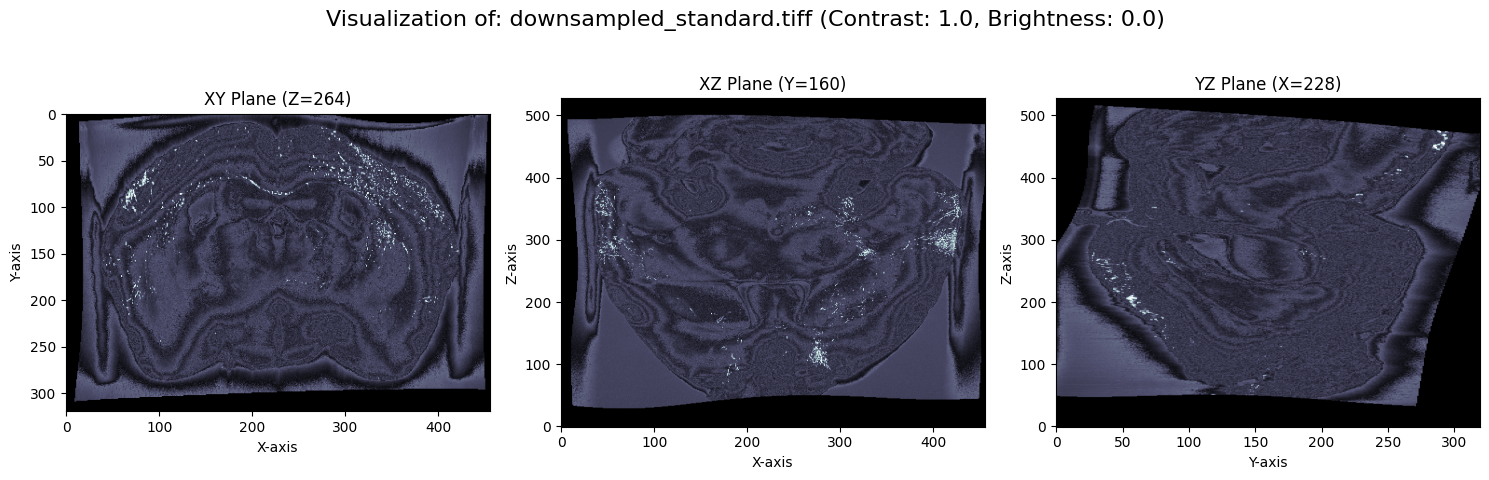

Successfully visualized 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\registration\downsampled_standard.tiff'.


In [4]:
reg_list = regExtract(reg_path)
print(reg_list)
downsampled_standard_autof = reg_list[3]
tiffVisualize(downsampled_standard_autof, views=3, colormap="bone")

# postprocessing
here we use thresholding to extract the exon segmentation masks in the atlas space

In [5]:
arrayStats(downsampled_standard_autof)

  Shape: (528, 320, 456)
  Dtype: uint16
  Min: 0
  Max: 255
  Mean: 51.7494812044167
  Std Dev: 36.07750506613907
  Non-zero count: 57426993
arr: [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Loading TIFF stack from: D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\registration\downsampled_standard.tiff
Saving 10 binned sub-tiffs to: D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\downsampled_standard_binned_tiffs
  - Saved bin 0 to bin_0_0.0-25.5.tif
  - Saved bin 1 to bin_1_25.5-51.0.tif
  - Saved bin 2 to bin_2_51.0-76.5.tif
  - Saved bin 3 to bin_3_76.5-102.0.tif
  - Saved bin 4 to bin_4_102.0-127.5.tif
  - Saved bin 5 to bin_5_127.5-153.0.tif
  - Adding bin 5 to composite with multiplier 0.20
  - Saved bin 6 to bin_6_153.0-178.5.tif
  - Adding bin 6 to composite with multiplier 0.40
  - Saved bin 7 to bin_7_178.5-204.0.tif
  - Adding bin 7 to composite with multiplier 0.60
  - Saved bin 8 to bin_8_204.0-229.5.tif
  - Adding bin 8 to composite with multiplier 0.80
  - Saved bin 9 to bin_9_229.5-255.0.tif
  - Adding bin 9 to composite with multiplier 1.00

Saving combined top bins TIFF...
Saved composite TIFF to: D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31

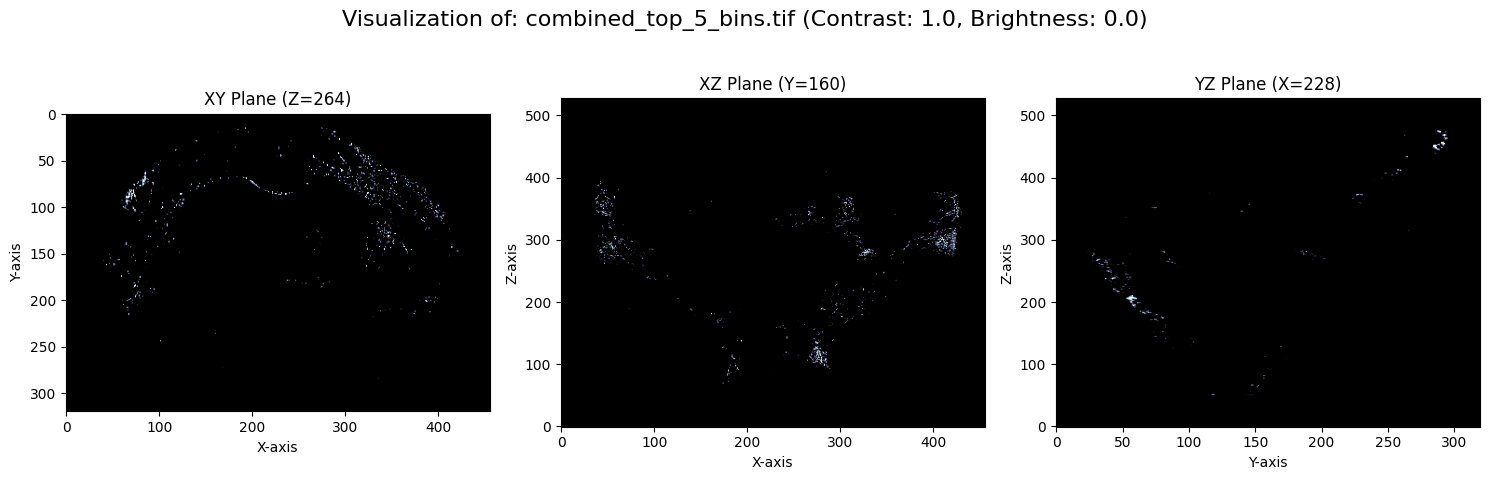

Successfully visualized 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\downsampled_standard_binned_tiffs\combined_top_5_bins.tif'.


In [6]:
downsampled_standard_autof_skeleton = skeletonize2(downsampled_standard_autof, exp_path)
tiffVisualize(downsampled_standard_autof_skeleton, views=3, colormap="bone")


In [8]:
arrayStats(downsampled_standard_autof_skeleton)

  Shape: (528, 320, 456)
  Dtype: uint8
  Min: 0
  Max: 255
  Mean: 0.5352986978128322
  Std Dev: 9.534818067330555
  Non-zero count: 331873
arr: [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


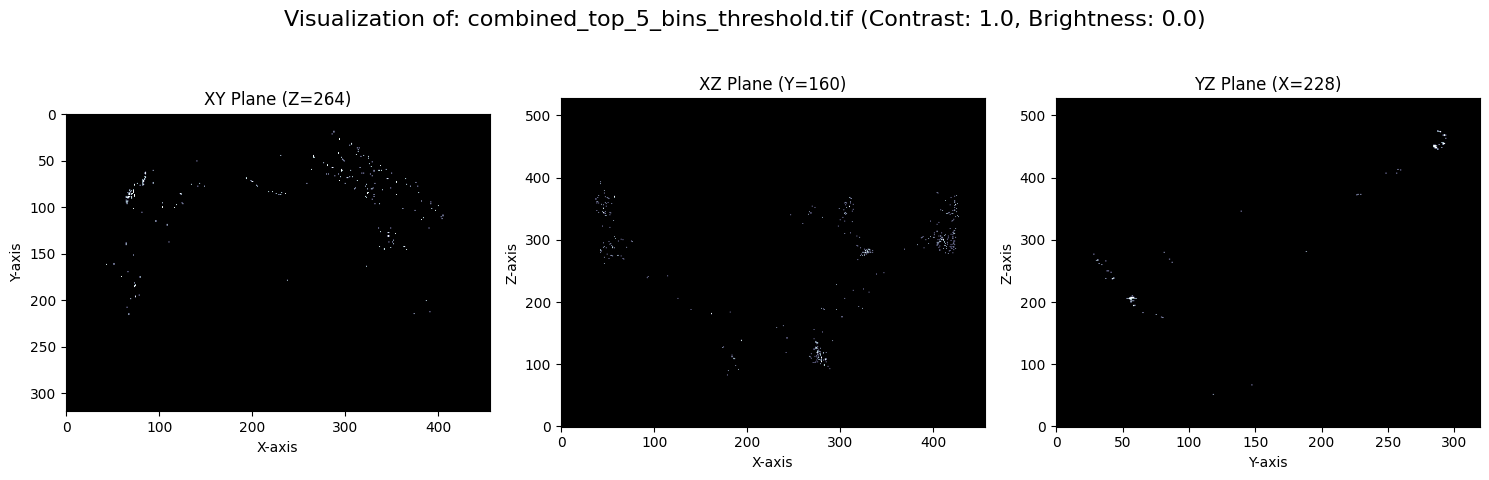

Successfully visualized 'D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\combined_top_5_bins_threshold.tif'.


In [7]:
downsampled_standard_autof_threshold = threshold(downsampled_standard_autof_skeleton, exp_path, threshold = 200)
tiffVisualize(downsampled_standard_autof_threshold, views=3, colormap="bone")

# congrats! you finished part1 switch from the trailmmap_env conda enviorment to the BrainRender enviorment and then move over to the visualization notebook to turn these into 3D

In [ ]:
print(exp_path)

D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31
